# Local Linear Embedding

Author: Chris Nunn, Jeremy Rothschild

[Theory](#linkTheory)  <br>
[Example 1: The classic cinnamon bun](#linkExample1)  <br>
[Example 2: Faces](#linkExample2) <br>
 
[Resources](#linkResources)  

### Theory<a id='linkTheory'></a>

CONTINUE

#### LLE algorithm

1. Compute neighors of $X_i$
2. Compute the weights $W_{ij}$ that best reconstruct each data point $X_i$ from it's neighbors, minimzing the cost function $J=\sum_i |X_i + \sum_j W_{ij}X_j|^2$ with constraints.
3. Compute the (lower dimensional) vectors $Y_i$ best reconstructed by the weights $W_{ij}$, minimzing the cost function $J=\sum_i |Y_i + \sum_j W_{ij}Y_j|^2$, which is equivalent to solving an eigenvector problem.

#### Discussion


#### Code

In the following sections we have written some examples of LLE.

### Example 1: The Swiss Roll Revisited<a id='linkExample1'></a>

In [7]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
#Axes3D

In [18]:
n_points = 1000
X, color = datasets.samples_generator.make_swiss_roll(n_points, random_state=0)
n_neighbors = 50
n_components = 2

standard: 0.51 sec
ltsa: 0.58 sec
hessian: 0.91 sec
modified: 0.74 sec


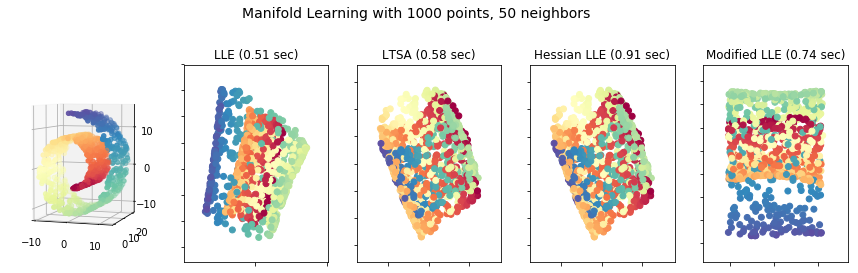

In [20]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    embedding = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method)
    Y = embedding.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

8 neighbors: 0.52 sec
10 neighbors: 0.5 sec
11 neighbors: 0.82 sec
12 neighbors: 0.55 sec
15 neighbors: 0.49 sec
20 neighbors: 0.57 sec
25 neighbors: 0.6 sec
30 neighbors: 0.59 sec
50 neighbors: 0.77 sec


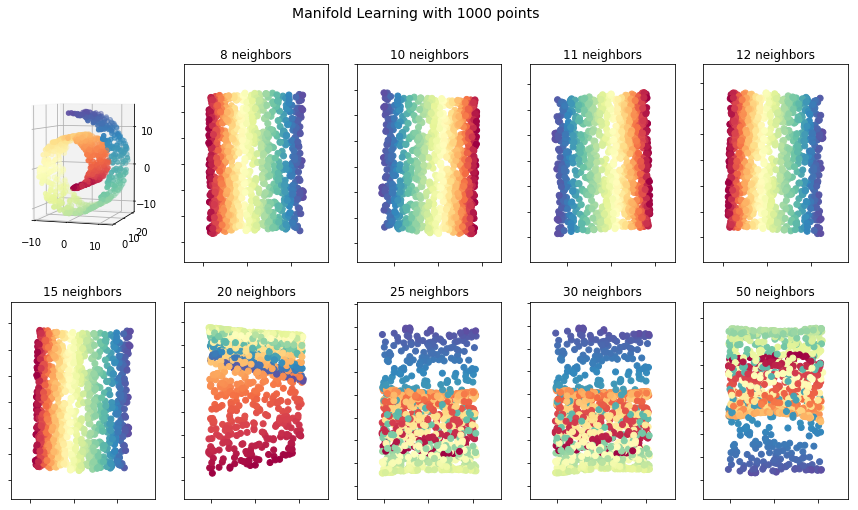

In [35]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points"
             % (1000), fontsize=14)

N_neighbors = [ 8, 10, 11, 12, 15, 20, 25, 30, 50]

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

method = methods[3] 

for i, num_neigh in enumerate(N_neighbors):
    t0 = time()
    embedding = manifold.LocallyLinearEmbedding(num_neigh, n_components,
                                        eigen_solver='auto',
                                        method=method)
    Y = embedding.fit_transform(X)
    t1 = time()
    print("%s neighbors: %.2g sec" % (num_neigh, t1 - t0))

    ax = fig.add_subplot(2, 5 , i+2) 
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s neighbors" % (num_neigh))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

### Example 2: Faces<a id='linkExample2'></a>

### Ressources<a id='linkResources'></a>

[classic paper](https://cs.nyu.edu/~roweis/lle/papers/lleintro.pdf)